# Multiclass Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier # for multiclass classification

In [2]:
def show_img(x):
    img = x.reshape(28, 28)
    plt.imshow(img, cmap=mlp.cm.binary, interpolation='nearest')
    plt.axis('off')

SKLearn detects when you use  binary or multiclass classification and automatically runs OVA or OVO. But, if you want to force it to use a specific strategy, you can use the classes OnevsRestClassifier or OnevsOneClassifier in sklearn.multiclass module. They accept a classifier in the construction and implement the above strategies.

As example, let's try to classify all the had-written digits in the MNIST dataset.

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

In [4]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [5]:
del X, y, mnist

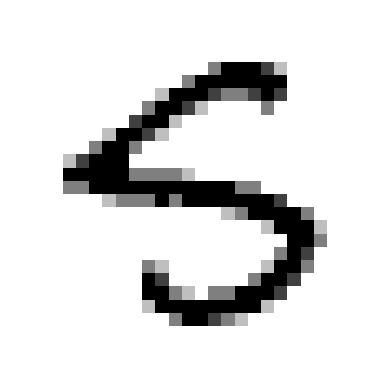

In [6]:
show_img(X_train[3500])

Now, we use OneVsOneClassifier with a KNeighbborsClassifier (k = 7)

In [7]:
ovo_clf = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  n_neighbors=7))

It is possible to access the 45 estimators through the estimators_ attribute and the decision scores for each class through the decision_function method.

In [8]:
print(ovo_clf.decision_function(X_test[:5]))
print(ovo_clf.predict(X_test[:5]))

[[ 7.78333333 -0.29239766  9.22222222  7.15384615  3.76388889  1.77777778
   0.83333333  6.27350427  5.27192982  3.24      ]
 [-0.3         7.84615385  9.22222222  6.87878788  4.95833333  1.9
   0.77777778  6.26041667  3.25        4.27192982]
 [ 6.77272727  1.7173913   3.74193548 -0.27642276  8.23188406  5.1875
   9.28571429  0.84615385  3.21052632  6.2826087 ]
 [ 1.70491803 -0.29310345  2.74193548  4.8125      7.21666667  6.19607843
   0.77777778  9.29166667  4.25806452  8.2962963 ]
 [ 0.70909091 -0.28666667  4.76        9.25        3.7962963   7.24
   1.7962963   3.12121212  8.29090909  6.28368794]]
[2 2 6 7 3]


Take first array: the highest score is 9.22(2) which corresponds to number 2.
7 is the most difficult number to distinguish.

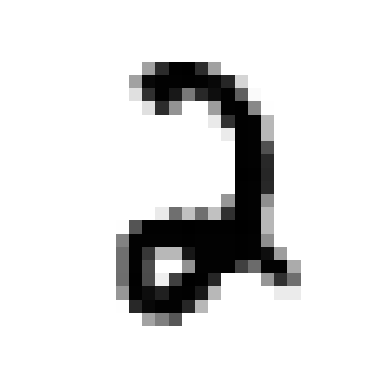

In [9]:
show_img(X_test[0])

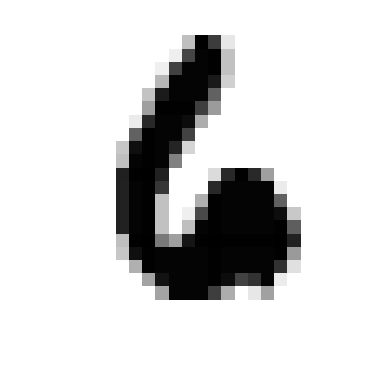

In [11]:
show_img(X_test[2])

As usual, we can use CVto evaluate the performance. Here we use LogisticRegression for performance issues.

In [13]:
pipe_clf = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression())
])

ovo_clf = OneVsOneClassifier(pipe_clf)
scores = cross_val_score(ovo_clf, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1, verbose=3) # cv = 3: split set into three subsets; 
print(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

[0.92634994 0.92536582 0.92487602]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.9s finished


## Error Analysis

Error analysis is the way to identify weak points in the algorithm to improve it.

We try now to analiaze the confusion matrix for a multiclass classification problem. In this case, we have to inspect a C x C matrix.

In [14]:
pipe_clf = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression())
])

y_train_predicted = cross_val_predict(pipe_clf, X_train, y_train, cv=3)
confusion_matrix = confusion_matrix(y_train, y_train_predicted)

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

[CV] END ................................ score: (test=0.925) total time=  30.9s
[CV] END ................................ score: (test=0.925) total time=  29.2s
[CV] END ................................ score: (test=0.925) total time=  30.5s
[CV] END ................................ score: (test=0.925) total time=  29.3s
[CV] END ................................ score: (test=0.926) total time=  29.0s


/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
confusion_matrix.shape

(10, 10)

We can plot the confusion matrix using the Matplotlib method matshow, but before that we divide each value by the number of images in the corresponding class. This way we get the error rates of each class and it's easier to highlight the most problematic cases for the model.

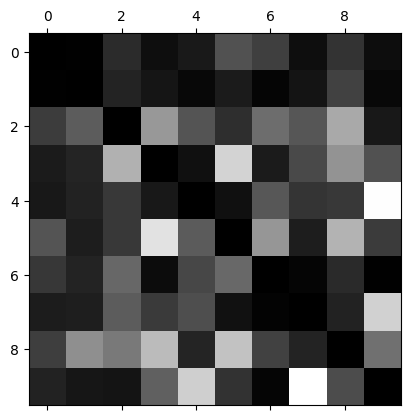

In [18]:
row_sums = confusion_matrix.sum(axis=1, keepdims=1)
norm_conf_matrix = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=mlp.cm.gray)

On the diagonal we have the true label.

Here the digit 3 is more likely misclassified as the digit 5 while the digit 4 is most likely misclassified as 9. The same happens with digit 7, while misclasification errors involving the digit 8 are referred to digit 5.

It's good, but not ready for the production.

# Precision/Recall trade-off

In [19]:
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X = X/255

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=1/7, random_state=42)

In [22]:
y_train_5 = (y_train == '5') # we learn to recognize the digit 5
y_test_5 = (y_test == '5')

Here we use LogisticRegression as an ML algorithm, since what we are tackling is a binary classification problem where the positive target indicates that the instance - a hand-written digit - is the digit 5.

In SKLearn, logistic regression algorithm is implemented by the class LogisticRegression in the module sklearn.linear_model, since logistic regression belongs to the family of linear models.

We use a not regularized classifier by using the parameter of the constructor: penalty. We set it to None

In [24]:
lg_cls = LogisticRegression(penalty=None)
lg_cls.fit(X_train, y_train_5)

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

Now, instead of calling the usual predict method, we would like to access to the score. In SKLearn, the score is returned by the method decision_function. Accessing the score is the only way in SKLearn to plat with the threshold, since its setting is not allowed.

In [25]:
lg_cls.decision_function([X_train[5]])

array([5.94805734])

We can get the score for all instances - digits - in the training set.

In [26]:
scores = lg_cls.decision_function(X_train)

In [27]:
scores[:10] # a sample of the scores

array([-14.52156532,  -9.15950249, -11.05629356,  -6.15632276,
       -11.02261338,   5.94805734,  -3.01766239,  -4.12267705,
       -12.767112  , -12.63770199])

The idea is to repeat what we did in the figure and to see the curve related to the precision and recal..

Given the scores, we can change the threshold and obtain different predictions w.r.t. the default behaviour in SKLearn.
For instance, we move the threshold from 0 to 3 and check how many positive instances are returned after changing threshold.

In [46]:
threshold = 4

Threshold = 0 => number of positive instances: 4929
Threshold = 3 => number of positive instances: 2306

It's expected that increasing the threshold by the number of instances classified as positive decreases.

To decide which threshold to use, we get the scores (already done) and use the precision_recall_curve function to compute the precision and recall for all possible thresholds. The method automatically computes the precision and the recall by varying the value of the threshold. For each threshold value, it returns its precision and recall.

In [47]:
from sklearn.metrics import precision_recall_curve

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, scores)

The function requires the true labels and the scores in order to compute the confusion matrix for each value of the threshold.
Now, we can plot the precision and the recall curves as function of the threshold.

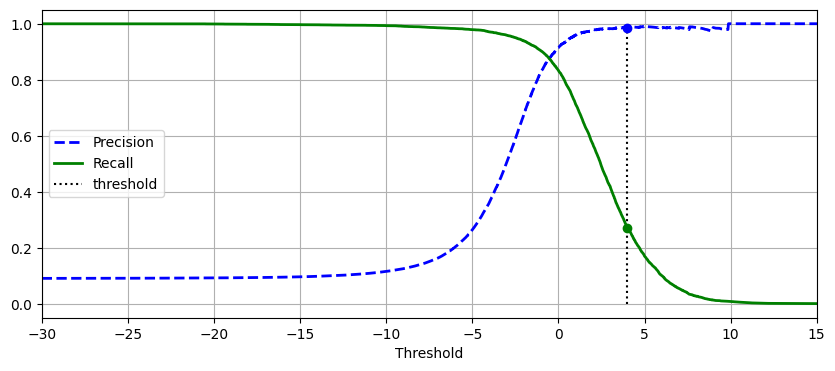

In [49]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()
ax.plot(thresholds, precisions[:-1], "b--", label="Precision", lw=2)
ax.plot(thresholds, recalls[:-1], "g-", label="Recall", lw=2)
ax.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")


idx = (thresholds >= threshold).argmax() # first index >= threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.grid()

ax.set_xlabel('Threshold')
ax.set_xlim((-30, 15))
plt.legend(loc='center left')
plt.show()

By using this figure, we can tune our model.

Another way to select a good trade-off between precision and recall is to directly plot precision against recall.
In practice, we have all the elements to plot this figure.

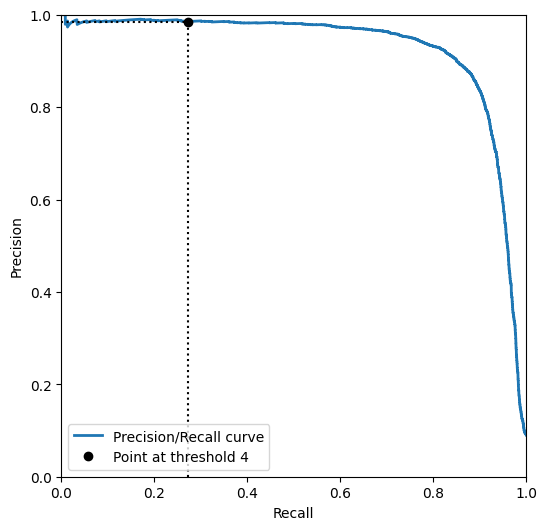

In [50]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(recalls, precisions, lw=2, label='Precision/Recall curve')

# print the precision, recall point corresponding to the threshold we selected
ax.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
ax.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
ax.plot([recalls[idx]], [precisions[idx]], "ko", label=f"Point at threshold {threshold}")

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.axis([0, 1, 0, 1])
ax.legend(loc='lower left')

You can exploit the precision/recall curve to search for the lowest threshold value which guarantee a precision equal to a target value. We try it with a precision equal to 0.9.

In [51]:
threshold_for_90_precision = thresholds[(precisions >= 0.90).argmax()]
threshold_for_90_precision

-0.2126399337094837

# ROC - Receiver Operating Curve - and AuC - Area under the ROC

ROC (Receiver OPerating Curve) is a common tool for binary classification. It plots the recall against the false positive rate FPR.
In SKLearn obtaining the ROC is straightforward since it provides us the function roc_curve, which acts in a way similar to the precision_recall_curve function.

In [52]:
from sklearn.metrics import roc_curve

In [53]:
fprs, recalls, thresholds = roc_curve(y_train_5, scores)

As previously, we can plot the list we got from roc_curve method.

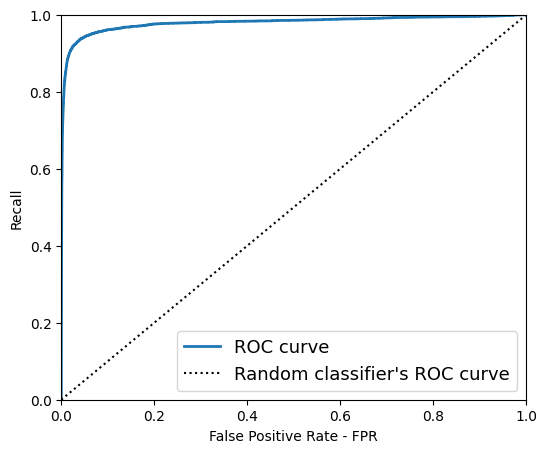

In [55]:
fig = plt.figure(figsize=(6, 5)) # extra code just for formatting
ax = fig.add_subplot()
ax.plot(fprs, recalls, linewidth=2, label='ROC curve')
ax.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
ax.set_xlabel('False Positive Rate - FPR')
ax.set_ylabel('Recall')
ax.axis([0, 1, 0, 1])
ax.legend(loc='lower right', fontsize=13)

Once again, we have to find a trade-off between recall and FPR. If we increase the recall -> FPR increases.

But, we can also exploit more. In fact, a perfect classifier is characterized by a ROC curve similar to a step function close to the upper-left corner. The area under this specific curve is 1. On the opposite, as shown in the figure, a random classifier is characterized by a ROC curve similar to a straight line from (0, 0) to (1, 1), whose area is 0.5. That suggests that the area of the region under the ROC curve may summarize the goodness of the classifier.

AUC is the area under the ROC curve. Values close to 1 indicate excellent performances, while values below 0.5 indicate it's better if we just flip a coin)
In SKLearn, AUC is computed by the method roc_auc_score in the module sklearn.metric.

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_train_5, scores)

0.979151132425784